In [39]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import os
import xgboost as xgb
import graphviz

In [2]:
df = pd.read_csv("taxi.csv")
df.sample(15)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
3327,214459,3,4,4269,751726,55.961844,37.409798,55.962322,37.407117,-1.000,-1.000,Standard,private,0
95130,515995,6,21,1126,593995,55.962987,37.413468,55.961995,37.406355,26.758,31.200,Economy,private,0
47715,1085562,2,5,4246,904608,55.880681,37.419087,55.895217,37.429728,-1.000,-1.000,Standard,business,1
62231,1019477,1,17,5298,231062,55.718072,37.661580,55.709941,37.734400,-1.000,-1.000,Premium,private,1
60502,989985,2,21,975,116991,55.960537,37.413353,55.962322,37.407117,47.028,49.967,Economy,private,0
39633,94187,0,19,1421,449662,55.961117,37.413284,55.962322,37.407117,44.443,51.783,Economy,private,0
9483,819114,5,5,1835,58619,55.702951,37.326218,55.689279,37.299960,60.282,60.250,Economy,private,0
57814,240538,0,23,2872,764627,55.947952,37.491628,55.962430,37.519577,41.517,40.383,Standard,private,1
15584,255011,5,19,3860,109213,55.962321,37.407116,55.962322,37.407117,44.185,51.017,Standard,private,0
89375,268316,3,23,1358,126932,55.964893,37.413543,55.962322,37.407117,51.891,53.517,Economy,SMB,0


In [3]:
pp.ProfileReport(df)

Класс предложения и класс поездки - категориальные переменные, перекодируем.

In [4]:
labelEnc = LabelEncoder()
columns_for_encode = ["offer_class_group","ride_type_desc"]
for column in columns_for_encode:
    df[column + "_enc"] = labelEnc.fit_transform(df[column])
df.sample(15)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class_group_enc,ride_type_desc_enc
28530,757105,0,19,1060,883608,55.961859,37.407126,55.962322,37.407117,31.555,36.250,Standard,private,0,4,3
51256,410882,5,0,6695,755279,55.414625,37.898779,55.410307,37.902451,60.484,60.533,Economy,private,0,1,3
40058,368452,0,23,1421,239331,55.961172,37.413284,55.962322,37.407117,44.372,53.650,Standard,private,0,4,3
18000,943487,0,21,6800,794226,55.670023,37.278837,55.670043,37.265239,7.320,17.583,Economy,private,1,1,3
76304,1043195,3,20,3563,429178,55.705590,37.509342,55.705691,37.507121,-1.000,-1.000,Economy,private,1,1,3
47422,710072,0,6,3789,339941,55.742768,37.609268,55.743469,37.613900,15.317,30.717,Economy,private,1,1,3
51933,586856,0,5,5130,579647,55.729930,37.623151,55.730200,37.635876,5.994,15.900,Economy,private,0,1,3
1891,463573,6,0,5828,303003,55.783849,37.569160,55.768272,37.590428,-1.000,-1.000,Standard,business,0,4,2
22457,482894,0,19,962,567763,55.912982,37.574317,55.913241,37.570946,-1.000,-1.000,Economy,private,1,1,3
77758,908340,6,6,1266,311130,55.428213,37.882975,55.410307,37.902451,-1.000,-1.000,Economy,private,1,1,3


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
offer_gk,100000.0,566218.928650,325935.980081,4.0,285555.250000,565671.500000,848719.750000,1.130355e+06
weekday_key,100000.0,3.159860,2.054222,0.0,1.000000,3.000000,5.000000,6.000000e+00
hour_key,100000.0,13.827790,7.306496,0.0,8.000000,16.000000,20.000000,2.300000e+01
driver_gk,100000.0,3446.376360,2038.738677,14.0,1421.000000,3506.500000,5242.000000,6.806000e+03
order_gk,100000.0,460867.012910,266064.989530,18.0,229178.500000,462420.000000,690894.000000,9.203440e+05
driver_latitude,100000.0,55.700824,2.135903,-1.0,55.708651,55.772904,55.960667,5.617410e+01
driver_longitude,100000.0,37.492292,1.454640,-1.0,37.413497,37.533664,37.624113,3.828055e+01
origin_order_latitude,100000.0,55.772440,0.665985,-1.0,55.708032,55.772561,55.962000,5.631112e+01
origin_order_longitude,100000.0,37.541637,0.467758,-1.0,37.407117,37.532537,37.624358,3.824361e+01
distance_km,100000.0,18.393518,41.129296,-1.0,-1.000000,10.411500,30.665250,5.234283e+03


Имеем значения -1 в колонках:  
- driver_latitude
- driver_longitude
- origin_order_latitude
- origin_order_longitude
- distance_km
- duration_min  
Рассмотрим их поближе.

In [6]:
df[df.driver_latitude < 1]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class_group_enc,ride_type_desc_enc
565,638186,5,14,6272,817074,-1.0,-1.0,55.908664,37.597781,-1.000,-1.000,Standard,business,1,4,2
2111,567790,1,12,6792,820788,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1,4,2
2129,302376,1,1,6792,548327,-1.0,-1.0,55.415361,37.898917,83.923,81.350,Standard,business,1,4,2
2137,427612,6,21,6792,32158,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1,4,2
2142,202875,6,3,6792,346671,-1.0,-1.0,55.415361,37.898917,70.529,65.000,Standard,business,1,4,2
2145,845726,6,0,6792,552732,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1,4,2
2183,177029,0,17,6792,658177,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1,4,2
2191,10275,3,11,6792,92302,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1,4,2
2221,1039638,5,22,6792,378336,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1,4,2
2268,378336,1,11,6792,354709,-1.0,-1.0,55.415361,37.898917,-1.000,-1.000,Standard,business,1,4,2


In [7]:
df[df.driver_latitude == -1].driver_response.unique()

array([1], dtype=int64)

Странная аномалия в данных - если координаты водителя не проставлены - он точно берется за заказ.  
Предположим, что это заказы, взятые "поднятой рукой", т.е. на месте.  
В таком случае, будем считать что координаты водителя совпадают с координатами пассажира.

In [8]:
minus_driver_coods_indexes = df[df.driver_latitude < 1].index
df.loc[minus_driver_coods_indexes,"driver_latitude"] = df.loc[minus_driver_coods_indexes,"origin_order_latitude" ]
df.loc[minus_driver_coods_indexes,"driver_longitude"] = df.loc[minus_driver_coods_indexes,"origin_order_longitude" ]

In [9]:
# Проверка, что больше -1 нет
df[df.driver_latitude < 1]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class_group_enc,ride_type_desc_enc


In [10]:
df[df.origin_order_longitude < 1]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class_group_enc,ride_type_desc_enc
1687,760201,6,17,1479,217451,55.730637,37.491326,-1.0,-1.0,2.942,6.300,Economy,private,1,1,3
9407,729617,1,21,1835,404650,55.484133,37.850971,-1.0,-1.0,-1.000,-1.000,Standard,private,0,4,3
43328,1033378,3,10,5586,386108,55.762383,37.772572,-1.0,-1.0,14.127,21.433,Economy,private,1,1,3
43688,299807,3,18,14,69484,55.640164,37.534014,-1.0,-1.0,9.998,22.133,Standard,private,1,4,3
51365,833482,0,20,75,782429,55.619920,37.395172,-1.0,-1.0,28.607,32.967,Economy,private,0,1,3
56004,1009826,3,19,4185,247078,55.758792,37.749308,-1.0,-1.0,11.281,21.167,Economy,private,1,1,3
58769,212838,2,7,6304,542162,55.638462,37.335678,-1.0,-1.0,48.557,47.300,Economy,private,0,1,3
60245,753313,1,16,1168,583148,55.984804,37.159184,-1.0,-1.0,-1.000,-1.000,Economy,private,1,1,3
64117,936069,5,15,737,139197,55.753351,37.667157,-1.0,-1.0,2.252,7.400,Standard,private,1,4,3
64694,1095202,3,20,5669,659570,55.741113,37.618121,-1.0,-1.0,7.199,20.200,Premium,private,1,3,3


По координатам пассажира ситуация аналогична таковой в случае, когда нет координат водителя. Так же будем считать, что координаты пассажира совпадают с коордимнатами водителя.

In [11]:
minus_passagner_coods_indexes = df[df.origin_order_longitude == -1].index
df.loc[minus_passagner_coods_indexes,"origin_order_latitude"] = df.loc[minus_passagner_coods_indexes,"driver_latitude" ]
df.loc[minus_passagner_coods_indexes,"origin_order_longitude"] = df.loc[minus_passagner_coods_indexes,"driver_longitude" ]

In [12]:
# Проверка, что больше -1 нет
df[df.origin_order_longitude < 1]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class_group_enc,ride_type_desc_enc


Посмотрим на строки с отрицательным или нулевым значением по расстоянию. 

In [13]:
df[df.distance_km < 1]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class_group_enc,ride_type_desc_enc
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.0,-1.0,Economy,private,0,1,3
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.0,-1.0,Economy,private,1,1,3
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.0,-1.0,Standard,business,1,4,2
19,533917,5,8,6080,596531,55.913718,37.401395,55.921554,37.403505,-1.0,-1.0,Standard,business,0,4,2
21,123897,4,12,6080,185909,55.766763,37.607275,55.772388,37.606330,-1.0,-1.0,Standard,business,0,4,2
28,552307,5,14,6080,408032,55.833520,37.408453,55.820369,37.446565,-1.0,-1.0,Standard,private,0,4,3
31,275040,4,7,6080,290066,55.913695,37.402437,55.906912,37.400428,-1.0,-1.0,Economy,private,0,1,3
32,73289,6,20,6080,106021,55.697348,37.549872,55.687560,37.543886,-1.0,-1.0,Standard,business,1,4,2
34,510200,5,23,6080,7313,55.783018,37.578878,55.783577,37.560083,-1.0,-1.0,Economy,private,0,1,3
36,1129673,6,17,6080,915127,55.850250,37.414420,55.856518,37.428684,-1.0,-1.0,Economy,private,0,1,3


Судя по всему, это отмененные клиентом поездки. Содержат как принятые, так и отвергнутые значения целевой переменной.

У нас три варианта действия:  
1. Брать какие-то средние значения
2. Игнорировать строки
3. Оставить как есть.  

Если вставляем средние значения - то тем самым можем исказить изначальные данные.  
Если игнорируем строки - лишаемся 25% данных.  
Если ничего не делаем - надеемся на то, что Random Forest каким-то образом сможет вычленить значение -1 как отдельный признак и корректно его учтет.  
Из всех вариантов, последний кажется предпочтительным, оставляем данные как есть.

Рассчитаем расстояние между водителем и пассажиром. Используем данные обоих для расчета.

In [14]:
# pip install haversine

In [15]:
from haversine import haversine, Unit

In [16]:
# Расчет расстояния по двум парам (lat\lon)
def calculate_haversine(row):
    driver = (row["driver_latitude"], row["driver_longitude"])
    passenger = (row["origin_order_latitude"], row["origin_order_longitude"])
#     Ранее мы убрали все подобные случаи. Оставляем для надежности 
    if driver[0] < 1 or driver[1] < 1 or passenger[0] < 1 or passenger[1] < 1:
        return -1
    return haversine(driver, passenger)

In [17]:
df["distance_driver_origin"] = df.apply(calculate_haversine, axis = 1)

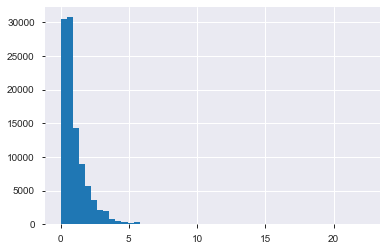

In [18]:
df["distance_driver_origin"].hist(bins=50)

Связаны ли расстояние между водителем и пассажиром и дистанция поездки? 

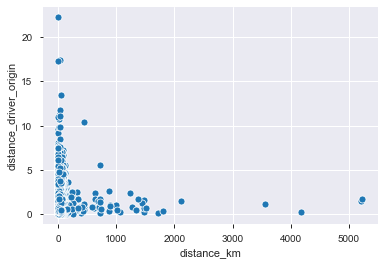

In [19]:
sns.scatterplot(
    x="distance_km",
    y = "distance_driver_origin",
    data=df)

Практически не связаны. Ок, значит мы вичислили новый независимый признак.

Еще раз взглянем на данные.
Возможно, отметим для себя еще что-то.

In [20]:
df.sample(15)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,offer_class_group_enc,ride_type_desc_enc,distance_driver_origin
4686,1085729,5,16,5187,380376,55.820875,37.660064,55.817165,37.656533,2.496,12.050,Economy,private,0,1,3,0.467804
59756,383092,5,15,675,5574,55.885123,37.389392,55.891422,37.420719,2.770,10.800,Economy,private,1,1,3,2.075294
37115,1026397,2,17,6713,618915,55.652802,37.388111,55.657937,37.408430,1.633,5.500,Standard,private,0,4,3,1.396713
92468,538998,6,15,3816,396314,55.796447,37.604938,55.792884,37.590118,7.627,12.717,Economy,private,1,1,3,1.007553
62277,682040,0,15,5298,606834,55.688578,37.574137,55.702186,37.561872,-1.000,-1.000,Premium,private,1,3,3,1.697173
74415,551912,6,19,2028,907049,55.761732,37.591577,55.761713,37.590535,2.140,9.900,Standard,private,1,4,3,0.065224
95572,387881,1,17,1126,127496,55.804836,37.707128,55.789429,37.656445,11.569,19.500,Delivery,private,0,0,3,3.601528
46513,864368,0,6,3917,96937,55.963671,37.415310,55.962322,37.407117,18.973,26.883,Standard,private,0,4,3,0.531529
94720,630126,1,0,5269,333023,55.962324,37.407116,55.962322,37.407117,36.762,44.350,Standard,private,0,4,3,0.000231
8627,988058,0,20,3303,215918,55.887696,37.446466,55.886890,37.446359,16.407,21.683,Economy,private,1,1,3,0.089871


Выведем названия всех колонок данных

In [21]:
# Колонки с данными в сете
train_columns = [x for x in df.columns if x != "driver_response"]
train_columns

['offer_gk',
 'weekday_key',
 'hour_key',
 'driver_gk',
 'order_gk',
 'driver_latitude',
 'driver_longitude',
 'origin_order_latitude',
 'origin_order_longitude',
 'distance_km',
 'duration_min',
 'offer_class_group',
 'ride_type_desc',
 'offer_class_group_enc',
 'ride_type_desc_enc',
 'distance_driver_origin']

Удалим колонки, которые нам больше не нужны

In [22]:
X = df[train_columns][df.distance_km != -1]
y = df["driver_response"][df.distance_km != -1]

Посмотрим на корреляции

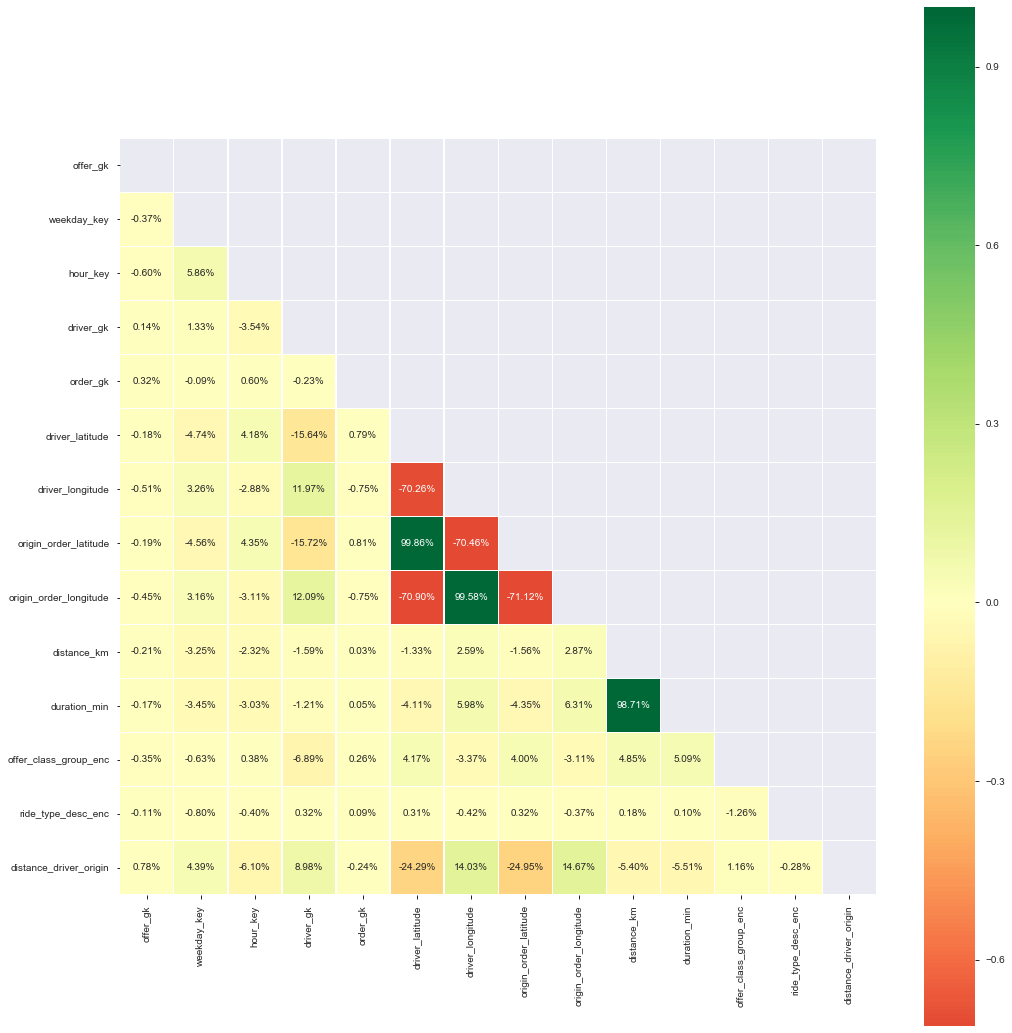

In [23]:
plt.figure(figsize = (15,15))
corr = X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', fmt="0.2%", linewidths=0.2, square=True, center=0)
plt.tight_layout()
plt.show()

Вычисленные признаки по водителям достаточно сильно связаны между собой, хотя и не на 100%.  
Значит, каждый из параметров несет свою порцию смысла, имеет смысл оставить их все.

Разделим выборку на обучающую и тестовую.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42)

На тестовой выборке создадим дополнительные параметры (их значения в тестовой в теории мы не знаем, и должны будем подставить ранее заготовленные) 

Идея в том, что разные водители имеют разные предпочтения по времени работы.  
Учитывая то, что мы имеем некоторую предварительную базу для подсчетов, логичным было бы ее использовать. Исходим из того, что водители склонны брать заказы в одно и то же время недели и суток.   
Создадим поддерживающую таблицу.  
Посмотрим имеющуюся статистику по каждому водителю в разрезе дней недели и часов.  
Смотреть будем распределения по дистанции до клиента, дистанции поездки в случаях, когда заказ был принят. 

In [25]:
# Расчет статистики по часам
driver_hours_stats = (
    X_train[X_train.distance_km > 0].pivot_table(
            index=["driver_gk","hour_key"],
            values=["distance_km","distance_driver_origin"],
            aggfunc= {
                "distance_km":["sum","mean","count", "std"],
                "distance_driver_origin": ["mean","std"]
            }
    )
).fillna(0)

# Делаем плоские названия столбцов
driver_hours_stats.columns = ["-".join(el) for el in driver_hours_stats.columns.to_flat_index()]
percent_column_names = driver_hours_stats.columns
# Сумма по дню
driver_hours_stats_sum = driver_hours_stats.groupby(level=[0]).sum()
# Добавляем сумму к почасовой разбивке
driver_hours_stats_full = driver_hours_stats.join(other=driver_hours_stats_sum, lsuffix="_hour", rsuffix="_day_sum")
# Высчитываем процент часа от всех присутствующих значений (сумма часа / сумма суток по водителю)
for col_name in percent_column_names:
    driver_hours_stats_full[col_name + "_day_percent"] = driver_hours_stats_full[col_name + "_hour"] / driver_hours_stats_full[col_name + "_day_sum"] 

# Колонки с процентом от суток
percent_cols = [col_name + "_day_percent" for col_name in percent_column_names]
driver_hours_stats_full[percent_cols].head()

distance_driver_origin-mean_day_percent  \
driver_gk hour_key                                            
14        0                                        0.035264   
          6                                        0.097160   
          7                                        0.072581   
          8                                        0.112016   
          9                                        0.054895   

                    distance_driver_origin-std_day_percent  \
driver_gk hour_key                                           
14        0                                       0.000000   
          6                                       0.140843   
          7                                       0.067988   
          8                                       0.065256   
          9                                       0.041572   

                    distance_km-count_day_percent  \
driver_gk hour_key                                  
14        0                              0.017241   
          6                              0.051724   
          7                              0.034483   
          8                              0.086207   
          9                              0.120690   

                    distance_km-mean_day_percent  distance_km-std_day_percent  \
driver_gk hour_key                                                              
14        0                             0.072783                     0.000000   
          6                             0.102799                     0.108993   
          7                             0.054110                     0.064057   
          8                             0.068672                     0.038248   
          9                             0.036473                     0.038623   

                    distance_km-sum_day_percent  
driver_gk hour_key                               
14        0                            0.022642  
          6                            0.095940  
          7                            0.033666  
          8                            0.106818  
          9                            0.079425

In [28]:
# Добавим вычисленные значения к сету
X_train = X_train.merge(
                    right=driver_hours_stats_full[percent_cols], 
                    how="left", 
                    left_on=["driver_gk","hour_key"], 
                    right_index=True
                ).fillna(0)
# В тестовый сет добавляем известные нам данные - из обучающего
X_test = X_test.merge(
                    right=driver_hours_stats_full[percent_cols], 
                    how="left", 
                    left_on=["driver_gk","hour_key"], 
                    right_index=True
                ).fillna(0)

X_train.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,...,ride_type_desc,offer_class_group_enc,ride_type_desc_enc,distance_driver_origin,distance_driver_origin-mean_day_percent,distance_driver_origin-std_day_percent,distance_km-count_day_percent,distance_km-mean_day_percent,distance_km-std_day_percent,distance_km-sum_day_percent
99813,600599,6,1,2442,834939,55.961335,37.413560,55.964892,37.413543,30.518,...,private,1,3,0.395522,0.025971,0.007467,0.061256,0.055318,0.055584,0.060829
85413,830966,5,23,468,550117,55.721931,37.610320,55.711306,37.613125,17.077,...,private,4,3,1.194440,0.146348,0.168621,0.055556,0.028949,0.024165,0.020649
23929,476779,1,23,2236,752181,55.962323,37.407117,55.964892,37.413543,54.925,...,private,1,3,0.491483,0.026500,0.043338,0.141379,0.047230,0.054638,0.136122
54352,475734,6,19,6166,682743,55.894592,37.410269,55.899396,37.401039,22.265,...,private,1,3,0.785167,0.052663,0.073092,0.066667,0.032017,0.036115,0.041925
25023,756700,1,1,4100,361584,55.961131,37.413188,55.962322,37.407117,66.763,...,private,4,3,0.400401,0.061225,0.024603,0.059937,0.082309,0.080850,0.067471


In [29]:
# Расчет статистики по дням недели
driver_week_stats = (
    X_train[X_train.distance_km > 0].pivot_table(
        index=["driver_gk","weekday_key"],
        values=["distance_km","distance_driver_origin"],
        aggfunc= {
            "distance_km":["sum","mean","count", "std"],
            "distance_driver_origin": ["mean","std"]
        }
)
).fillna(0)
# Делаем плоские названия столбцов
driver_week_stats.columns = ["-".join(el) for el in driver_week_stats.columns.to_flat_index()]
percent_column_names = driver_week_stats.columns
# Сумма по неделе
driver_week_stats_sum = driver_week_stats.groupby(level=[0]).sum()
# Добавляем сумму недели к дневной разбивке
driver_week_stats_full = driver_week_stats.join(other=driver_week_stats_sum, lsuffix="_day", rsuffix="_week_sum")
# Высчитываем процент дня от всей недели (сумма дня / сумма недели по водителю)
for col_name in percent_column_names:
    driver_week_stats_full[col_name + "_week_percent"] = driver_week_stats_full[col_name + "_day"] / driver_week_stats_full[col_name + "_week_sum"] 

percent_cols = [col_name + "_week_percent" for col_name in percent_column_names]
# Колонки с процентом от суток
driver_week_stats_full[percent_cols].head()

distance_driver_origin-mean_week_percent  \
driver_gk weekday_key                                             
14        0                                            0.227579   
          2                                            0.120999   
          3                                            0.150621   
          4                                            0.117132   
          5                                            0.173746   

                       distance_driver_origin-std_week_percent  \
driver_gk weekday_key                                            
14        0                                           0.227637   
          2                                           0.110042   
          3                                           0.117349   
          4                                           0.115305   
          5                                           0.227241   

                       distance_km-count_week_percent  \
driver_gk weekday_key                                   
14        0                                  0.120690   
          2                                  0.155172   
          3                                  0.086207   
          4                                  0.155172   
          5                                  0.258621   

                       distance_km-mean_week_percent  \
driver_gk weekday_key                                  
14        0                                 0.261216   
          2                                 0.129231   
          3                                 0.104856   
          4                                 0.134749   
          5                                 0.181996   

                       distance_km-std_week_percent  \
driver_gk weekday_key                                 
14        0                                0.345928   
          2                                0.095208   
          3                                0.120747   
          4                                0.133864   
          5                                0.167917   

                       distance_km-sum_week_percent  
driver_gk weekday_key                                
14        0                                0.184662  
          2                                0.117460  
          3                                0.052947  
          4                                0.122475  
          5                                0.275697

In [30]:
# Добавим вычисленные значения к сету
X_train = X_train.merge(
                    right=driver_week_stats_full[percent_cols], 
                    how="left", 
                    left_on=["driver_gk","weekday_key"], 
                    right_index=True
                ).fillna(0)
X_test = X_test.merge(
                    right=driver_week_stats_full[percent_cols], 
                    how="left", 
                    left_on=["driver_gk","weekday_key"], 
                    right_index=True
                ).fillna(0)
X_train.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,...,distance_km-count_day_percent,distance_km-mean_day_percent,distance_km-std_day_percent,distance_km-sum_day_percent,distance_driver_origin-mean_week_percent,distance_driver_origin-std_week_percent,distance_km-count_week_percent,distance_km-mean_week_percent,distance_km-std_week_percent,distance_km-sum_week_percent
99813,600599,6,1,2442,834939,55.961335,37.413560,55.964892,37.413543,30.518,...,0.061256,0.055318,0.055584,0.060829,0.126828,0.089901,0.147014,0.154442,0.147241,0.152887
85413,830966,5,23,468,550117,55.721931,37.610320,55.711306,37.613125,17.077,...,0.055556,0.028949,0.024165,0.020649,0.129883,0.183972,0.333333,0.043284,0.027207,0.141882
23929,476779,1,23,2236,752181,55.962323,37.407117,55.964892,37.413543,54.925,...,0.141379,0.047230,0.054638,0.136122,0.125709,0.115688,0.158621,0.119444,0.129595,0.135713
54352,475734,6,19,6166,682743,55.894592,37.410269,55.899396,37.401039,22.265,...,0.066667,0.032017,0.036115,0.041925,0.151610,0.192336,0.219048,0.148550,0.151039,0.204482
25023,756700,1,1,4100,361584,55.961131,37.413188,55.962322,37.407117,66.763,...,0.059937,0.082309,0.080850,0.067471,0.122318,0.038611,0.268139,0.139572,0.144161,0.262800


In [31]:
# Удалим лишние колонки
cols_to_exclude = ([
    "offer_gk",
    "order_gk",
    "driver_gk",
    'driver_latitude',
    'driver_longitude',
    'origin_order_latitude',
    'origin_order_longitude',
    "duration_min",
    "offer_class_group",
    "ride_type_desc"                 
    ])
X_train.drop(cols_to_exclude, axis=1, inplace = True)
X_test.drop( cols_to_exclude, axis=1, inplace = True)

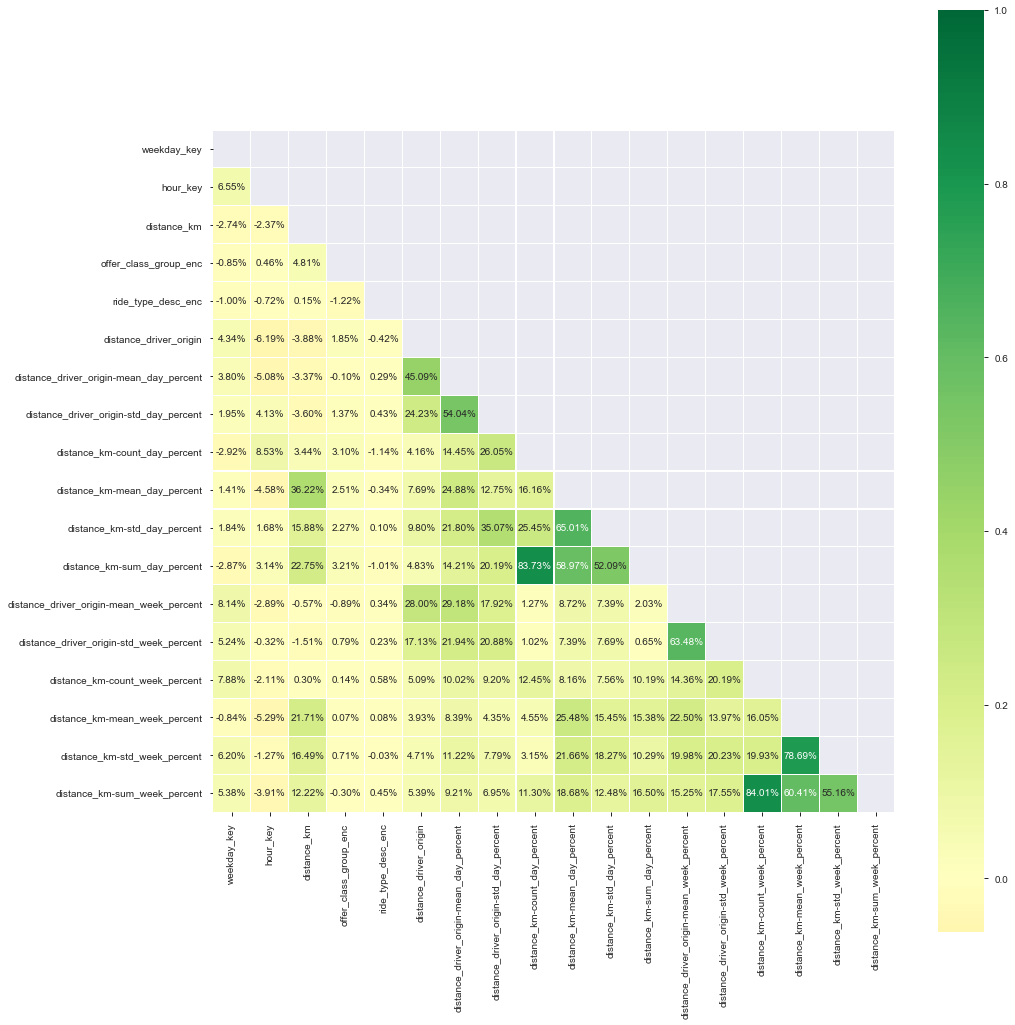

In [34]:
plt.figure(figsize = (15,15))
corr = X_train.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', fmt="0.2%", linewidths=0.2, square=True, center=0)
plt.tight_layout()
plt.show()

In [35]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)
headers = list(X_train.columns.values)
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

No handles with labels found to put in legend.


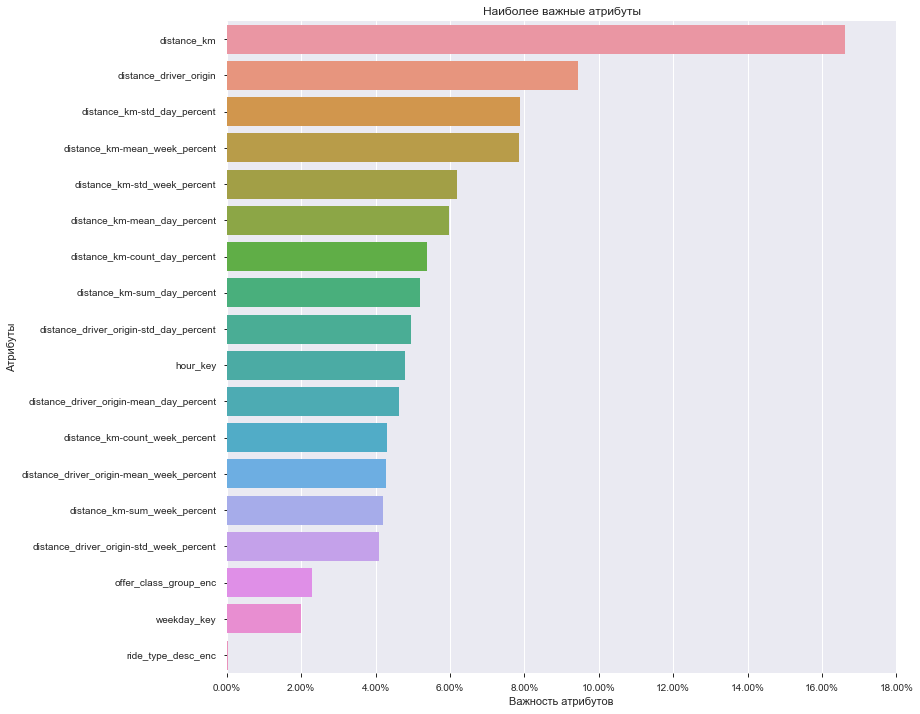

In [36]:
f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)

x_ticks = np.linspace(start = 0, stop =0.2, num =  10, endpoint = False)
plt.xticks(x_ticks, [f"{x:0.2%}" for x in x_ticks])
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [37]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80     19541
           1       0.76      0.81      0.78     17356

    accuracy                           0.79     36897
   macro avg       0.79      0.79      0.79     36897
weighted avg       0.79      0.79      0.79     36897



0.7908231021492262

Неплохой результат.
Попробуем xgboost

In [40]:
# pip install xgboost
# pip install graphviz
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Gorelov\\Anaconda3\\Library\\bin\\graphviz\\'

In [41]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

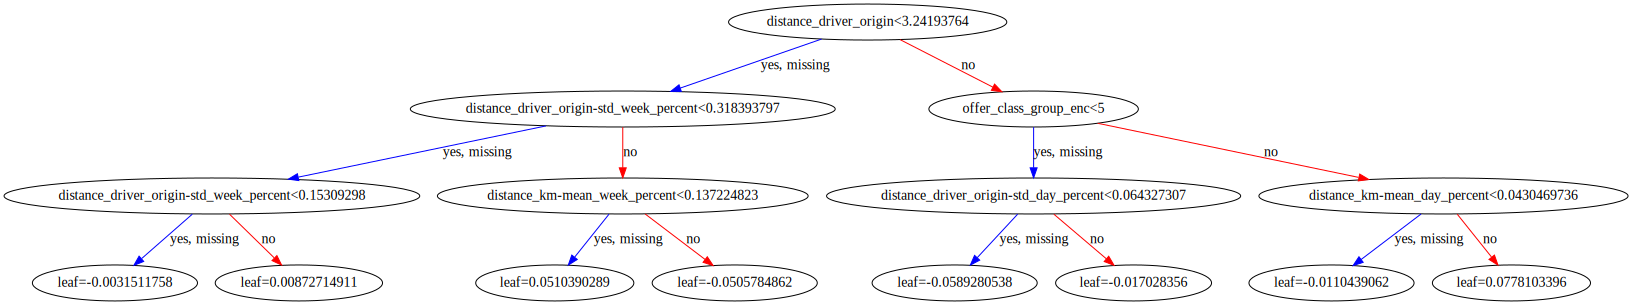

In [43]:
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

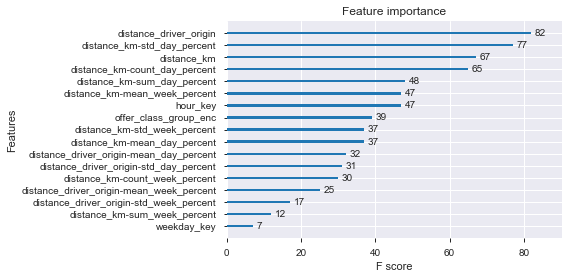

In [44]:
xgb.plot_importance(xgb_model)

In [45]:
model_pred = xgb_model.predict(X_test)
print(classification_report(y_test, model_pred))
xgb_model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.80      0.71      0.76     19541
           1       0.71      0.80      0.76     17356

    accuracy                           0.76     36897
   macro avg       0.76      0.76      0.76     36897
weighted avg       0.76      0.76      0.76     36897



0.7559964224733718

Тоже неплохо.